In [1]:
import datetime
import pandas as pd
from theoEngine import TheoEngine

%matplotlib notebook

In [2]:
underlying_pair = "BTC/USD"
underlying_price = 3400
atm_volatility = 60   # percent
interest_rate = 0

strikes = list(range(2000, 6000, 500))
print("Strikes: " + str(strikes))
expirations = [datetime.datetime(year=2019, month=x, day=1) for x in range(3,9)]
print("Expirations: " + str(expirations))

# strikes = [3000]
# expirations = [datetime.datetime(year=2019, month=3, day=1)]

theo_engine = TheoEngine(
    underlying_pair=underlying_pair,
    underlying_price=underlying_price,
    strikes=strikes,
    expirations=expirations,
    atm_volatility=atm_volatility,
    interest_rate=interest_rate
)

Strikes: [2000, 2500, 3000, 3500, 4000, 4500, 5000, 5500]
Expirations: [datetime.datetime(2019, 3, 1, 0, 0), datetime.datetime(2019, 4, 1, 0, 0), datetime.datetime(2019, 5, 1, 0, 0), datetime.datetime(2019, 6, 1, 0, 0), datetime.datetime(2019, 7, 1, 0, 0), datetime.datetime(2019, 8, 1, 0, 0)]
Calculated greeks for BTC/USD 2000 call with expiry 2019-03-01 00:00:00: delta=0.999851706444076, gamma=-0.12074312726856917, theta=0.005643171261681346
Calculated greeks for BTC/USD 2000 put with expiry 2019-03-01 00:00:00: delta=-0.00014829355592410425, gamma=-0.12074312726856917, theta=0.005643171261573154
Calculated greeks for BTC/USD 2500 call with expiry 2019-03-01 00:00:00: delta=0.9833386137748661, gamma=-0.12660017932180204, theta=0.44744736366237703
Calculated greeks for BTC/USD 2500 put with expiry 2019-03-01 00:00:00: delta=-0.016661386225133936, gamma=-0.12660017932180204, theta=0.4474473636624339
Calculated greeks for BTC/USD 3000 call with expiry 2019-03-01 00:00:00: delta=0.8187680

In [10]:
option_df_dict = {
    'call': {},
    'put': {}
}
for expiry in theo_engine.expirations:
    for call_put in ['call','put']:
        option_df_dict[call_put][expiry] = {}
    for strike in theo_engine.strikes:
        for call_put in ['call','put']:
            option_df_dict[call_put][expiry][strike] = pd.DataFrame(columns=['Theo','Delta','Gamma','Theta'])

lower_underlying_price = 2000
upper_underlying_price = 6000
increment=25
for price in range(lower_underlying_price, upper_underlying_price, increment):
    print("Calculating greeks for underlying price=" + str(price) + "...")
    theo_engine.update_underlying_price(price)
    for expiry in theo_engine.expirations:
        for strike in theo_engine.strikes:
            for call_put in ['call','put']:
                option = theo_engine.options[call_put][expiry][strike]
                option_df_dict[call_put][expiry][strike].loc[price] = [option.theo, option.delta, option.gamma, option.theta]

Calculating greeks for underlying price=2000...
Calculating greeks for underlying price=2025...
Calculating greeks for underlying price=2050...
Calculating greeks for underlying price=2075...
Calculating greeks for underlying price=2100...
Calculating greeks for underlying price=2125...
Calculating greeks for underlying price=2150...
Calculating greeks for underlying price=2175...
Calculating greeks for underlying price=2200...
Calculating greeks for underlying price=2225...
Calculating greeks for underlying price=2250...
Calculating greeks for underlying price=2275...
Calculating greeks for underlying price=2300...
Calculating greeks for underlying price=2325...
Calculating greeks for underlying price=2350...
Calculating greeks for underlying price=2375...
Calculating greeks for underlying price=2400...
Calculating greeks for underlying price=2425...
Calculating greeks for underlying price=2450...
Calculating greeks for underlying price=2475...
Calculating greeks for underlying price=

In [11]:
def plot_by_strike(option_df_dict, expiry, variable):
    for call_put in ['call','put']:
        strike = list(option_df_dict[call_put][expiry])[0]
        title= str(expiry) + " " + call_put + "s"
        is_first = True
        for strike in list(option_df_dict[call_put][expiry]):
            df = option_df_dict[call_put][expiry][strike].copy()
            df.columns = [x + "_" + str(strike) for x in df.columns]
            if is_first:
                ax = df.plot(y=[variable + "_" + str(strike)], title=title)
                is_first = False
            else:
                df.plot(y=[variable + "_" + str(strike)], ax=ax)

<IPython.core.display.Javascript object>


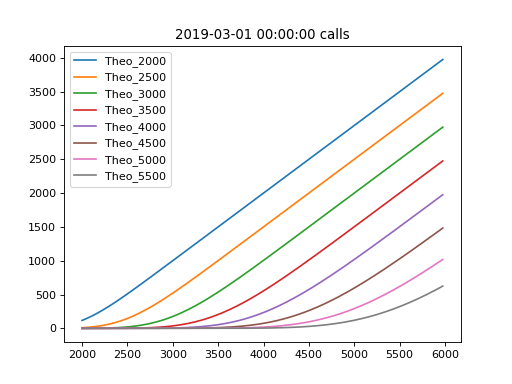

<IPython.core.display.Javascript object>


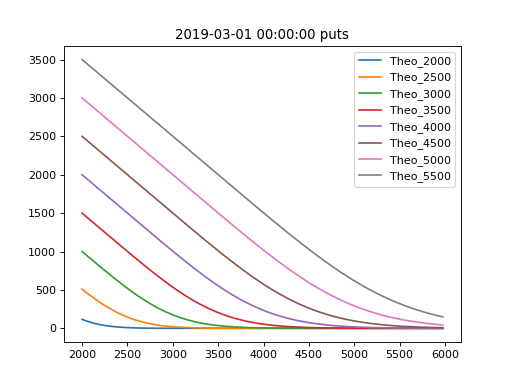

<IPython.core.display.Javascript object>


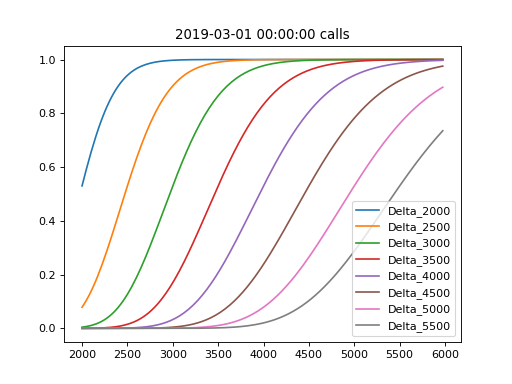

<IPython.core.display.Javascript object>


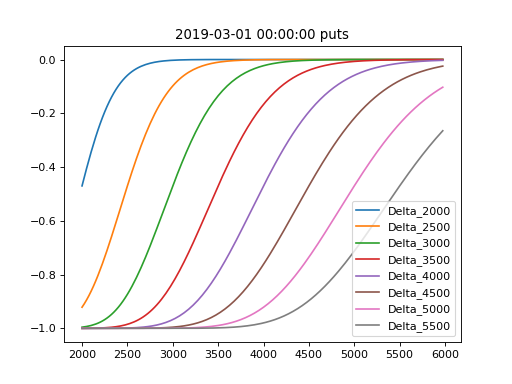

<IPython.core.display.Javascript object>


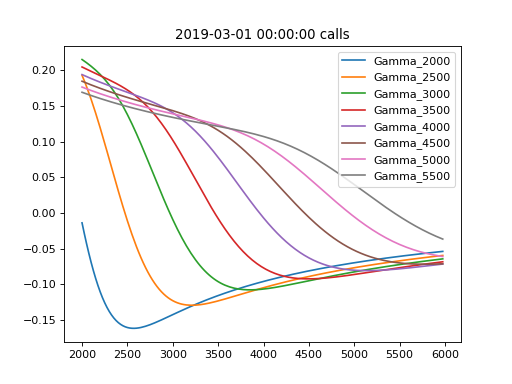

<IPython.core.display.Javascript object>


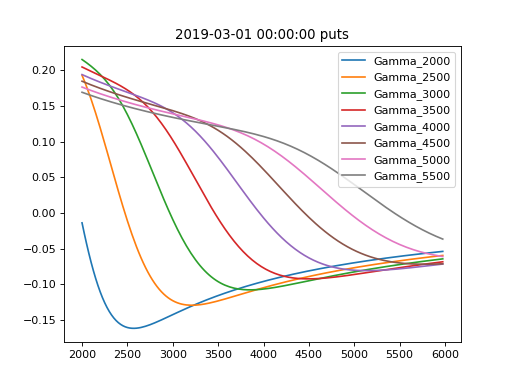

<IPython.core.display.Javascript object>


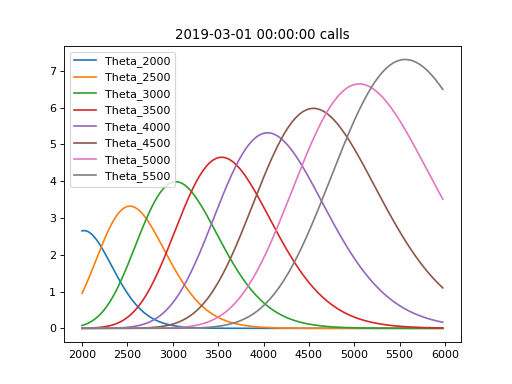

<IPython.core.display.Javascript object>


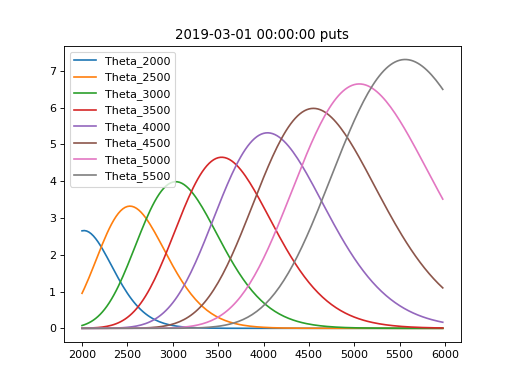

In [12]:
expiry = expirations[0]
plot_by_strike(option_df_dict, expiry, 'Theo')
plot_by_strike(option_df_dict, expiry, 'Delta')
plot_by_strike(option_df_dict, expiry, 'Gamma')
plot_by_strike(option_df_dict, expiry, 'Theta')